<a href="https://www.kaggle.com/code/daehob/my-first-titanic?scriptVersionId=185515467" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df_train=pd.read_csv('/kaggle/input/titanic/train.csv')
df_test=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
for col in df_train.columns:
    msg = 'columns: {:10}\t Percentage of NaN = {:.2f}%'.format(col, (100 * (df_train[col].isnull().sum() / df_train.shape[0])))
    print(msg)

columns: PassengerId	 Percentage of NaN = 0.00%
columns: Survived  	 Percentage of NaN = 0.00%
columns: Pclass    	 Percentage of NaN = 0.00%
columns: Name      	 Percentage of NaN = 0.00%
columns: Sex       	 Percentage of NaN = 0.00%
columns: Age       	 Percentage of NaN = 19.87%
columns: SibSp     	 Percentage of NaN = 0.00%
columns: Parch     	 Percentage of NaN = 0.00%
columns: Ticket    	 Percentage of NaN = 0.00%
columns: Fare      	 Percentage of NaN = 0.00%
columns: Cabin     	 Percentage of NaN = 77.10%
columns: Embarked  	 Percentage of NaN = 0.22%


In [7]:
for col in df_test.columns:
    msg = 'columns: {:10}\t Percentage of NaN = {:.2f}%'.format(col, (100 * (df_test[col].isnull().sum() / df_test.shape[0])))
    print(msg)

columns: PassengerId	 Percentage of NaN = 0.00%
columns: Pclass    	 Percentage of NaN = 0.00%
columns: Name      	 Percentage of NaN = 0.00%
columns: Sex       	 Percentage of NaN = 0.00%
columns: Age       	 Percentage of NaN = 20.57%
columns: SibSp     	 Percentage of NaN = 0.00%
columns: Parch     	 Percentage of NaN = 0.00%
columns: Ticket    	 Percentage of NaN = 0.00%
columns: Fare      	 Percentage of NaN = 0.24%
columns: Cabin     	 Percentage of NaN = 78.23%
columns: Embarked  	 Percentage of NaN = 0.00%


<Axes: >

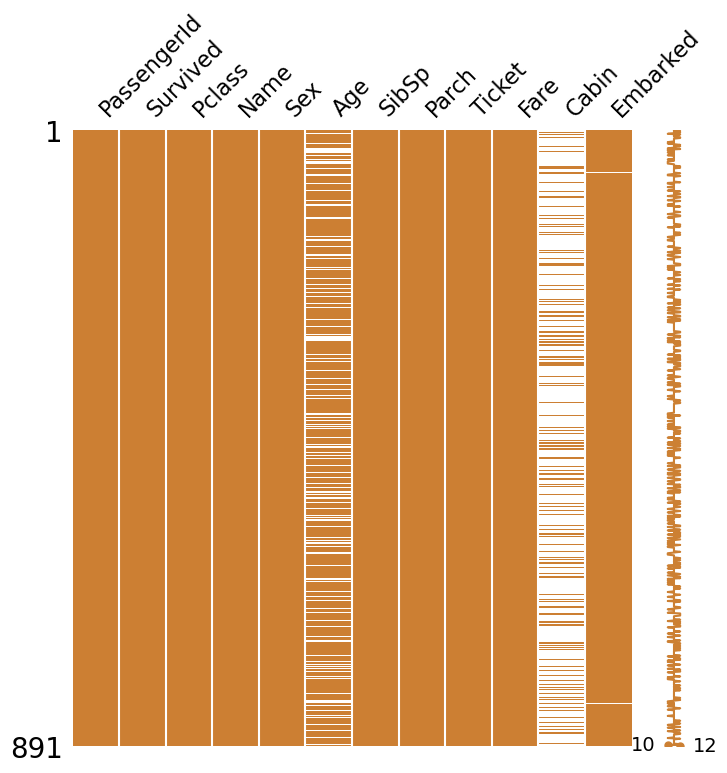

In [8]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2))
#원하는 데이터프레임에서 오류를 나타내주는 메소드

<Axes: >

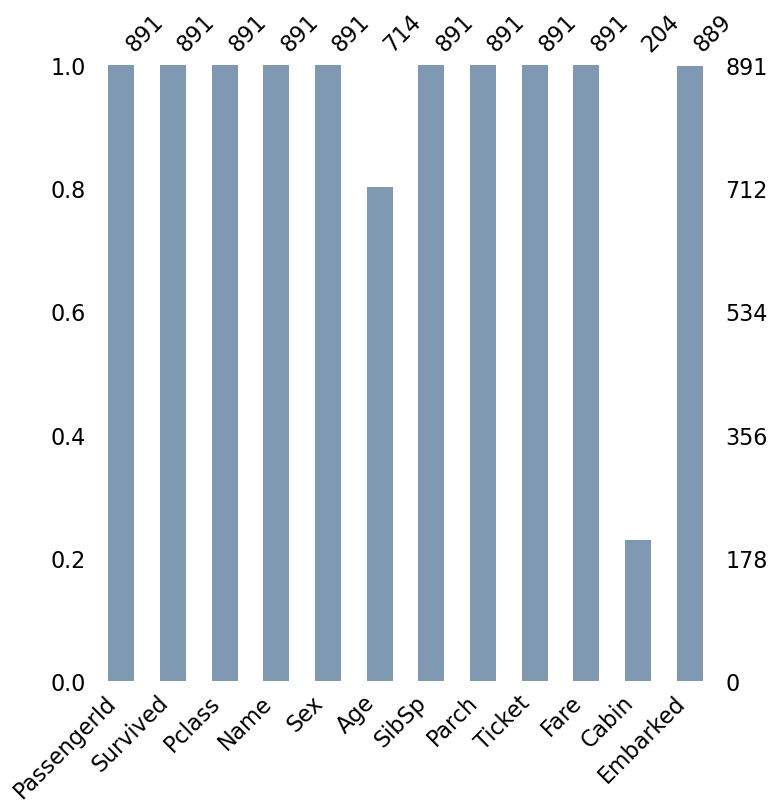

In [9]:
msno.bar(df=df_train.iloc[:, :], figsize=(8,8), color=(0.5, 0.6, 0.7))

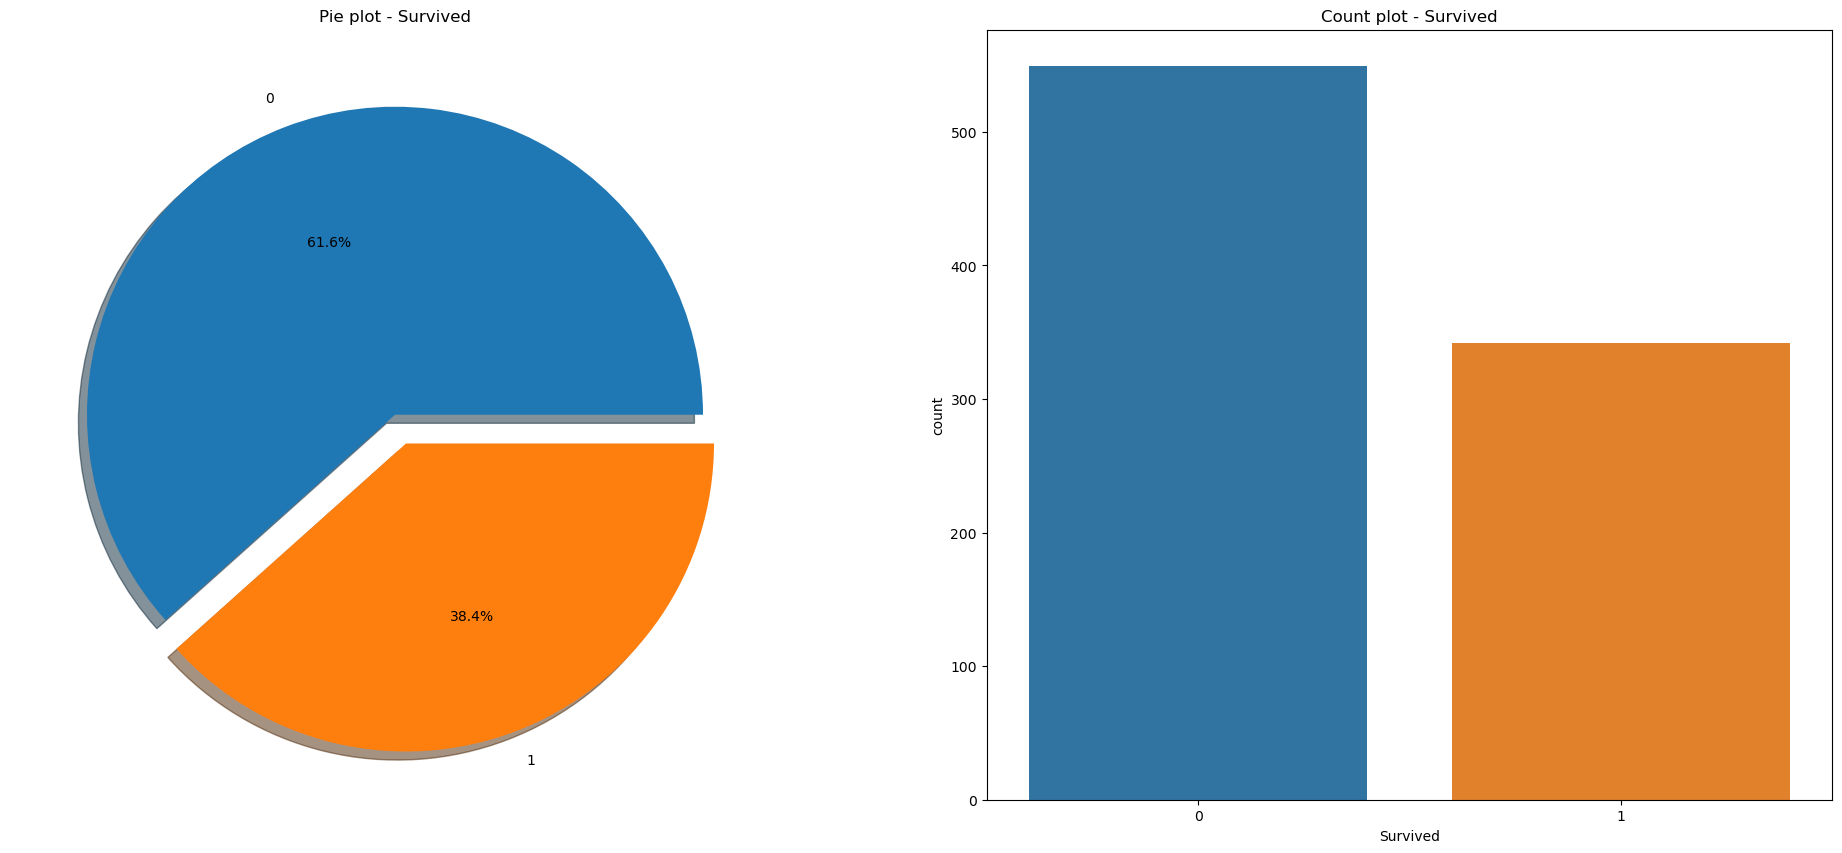

In [10]:
f, ax = plt.subplots(1, 2, figsize=(24, 10)) # 1, 2 -> 1 row, 2 columns 팔레트 준비

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived') # ax는 subplot의 어디에 그리겠다? 팔레트의 인덱스
ax[0].set_ylabel('')
sns.countplot(x = 'Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

<Axes: >

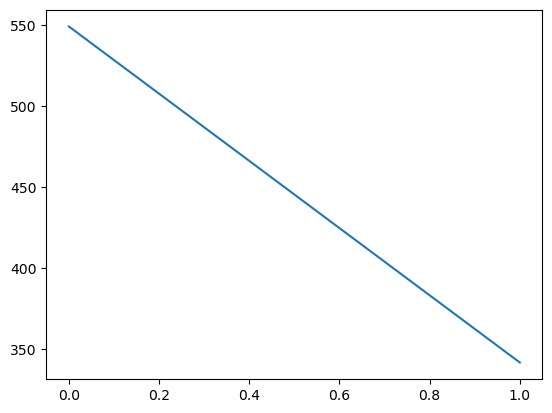

In [11]:
df_train['Survived'].value_counts().plot() # 항상 시리즈들은 plot을 갖고 있다.

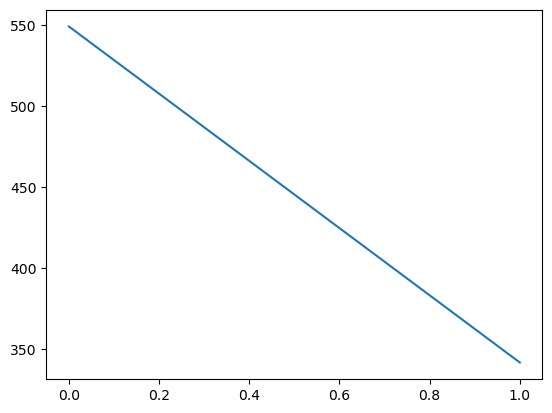

In [12]:
plt.plot(df_train['Survived'].value_counts())

([<matplotlib.patches.Wedge at 0x7e54bec59db0>,
 [Text(-0.3925749350994583, 1.0275626113924428, ''),
  Text(0.42826367051652175, -1.1209773541493675, '')],
 [Text(-0.21413178278152267, 0.5604886971231505, '61.62%'),
  Text(0.249820474467971, -0.6539034565871309, '38.38%')])

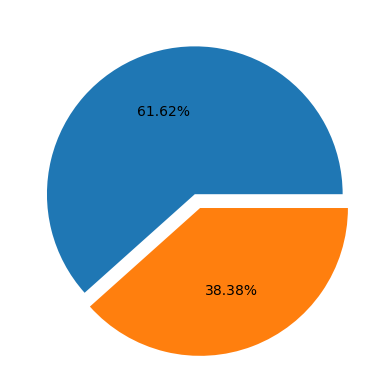

In [13]:
plt.pie(df_train['Survived'].value_counts(), explode=[0, 0.1], autopct='%1.2f%%')

## 2.1 Pclass

In [14]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [15]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [16]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='cool')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<Axes: xlabel='Pclass'>

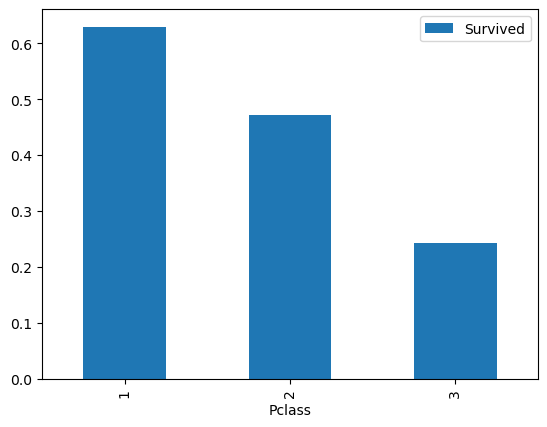

In [17]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

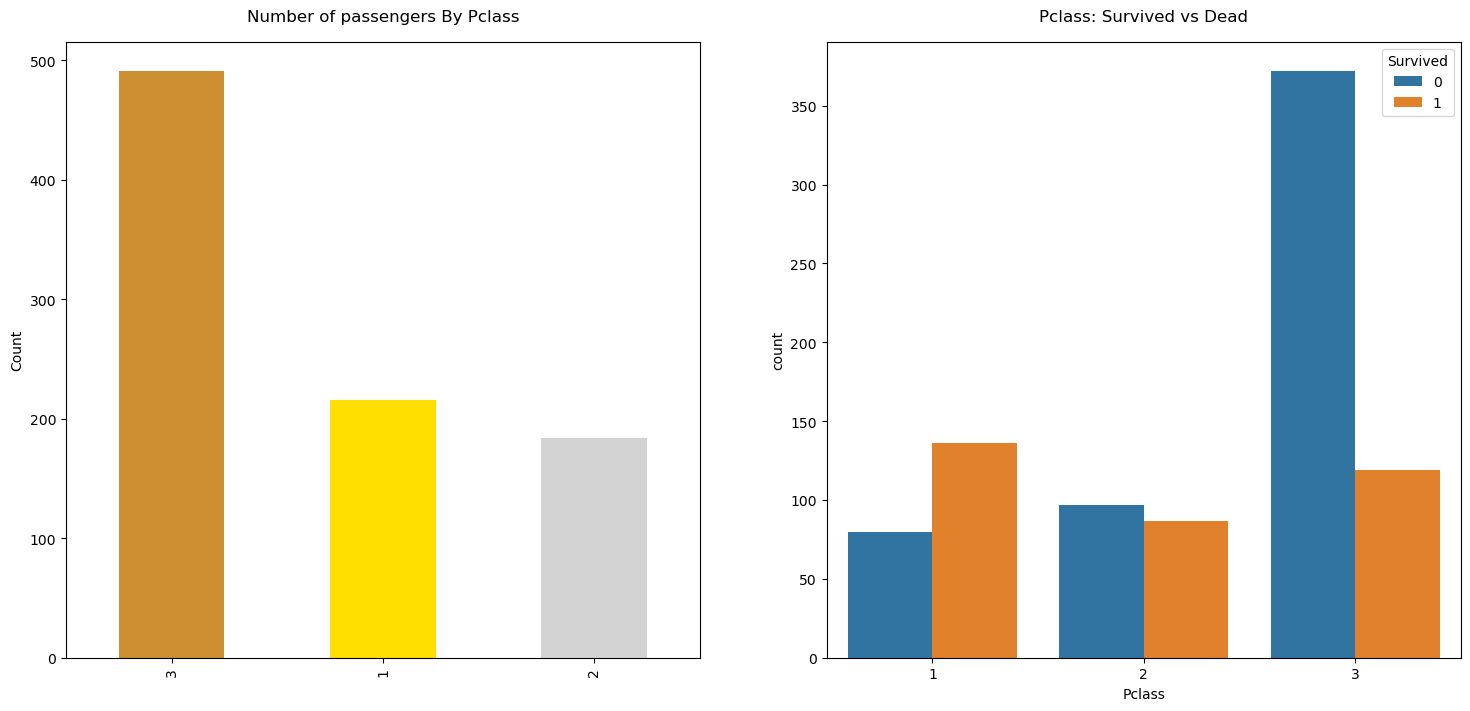

In [18]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD8F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')  # (x or y), hue -> countplot은 2가지 인자만 들어올 수 있다.
sns.countplot(data=df_train, x=df_train['Pclass'], hue='Survived',  ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 Sex

Text(0.5, 1.0, 'Sex: Survived vs Dead')

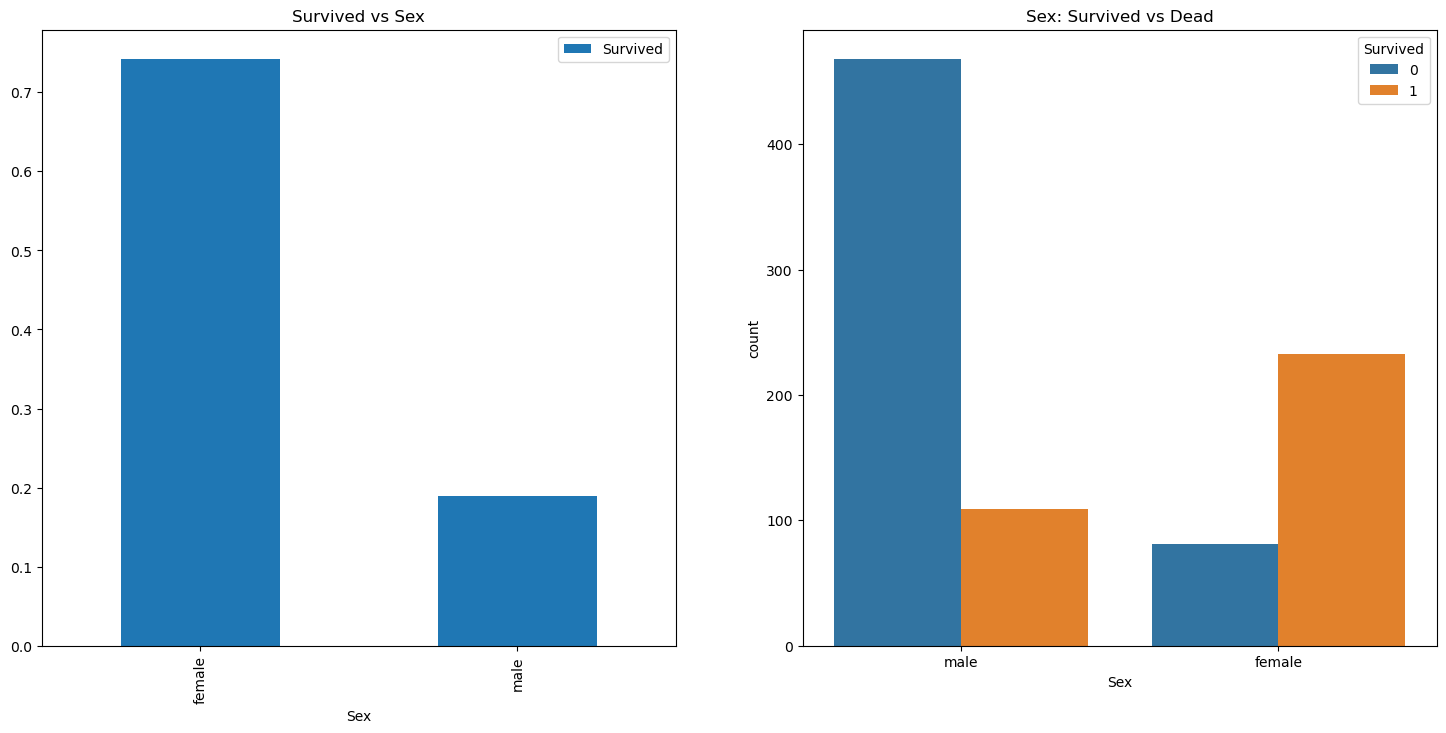

In [19]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot(x= 'Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')

<Axes: xlabel='Sex'>

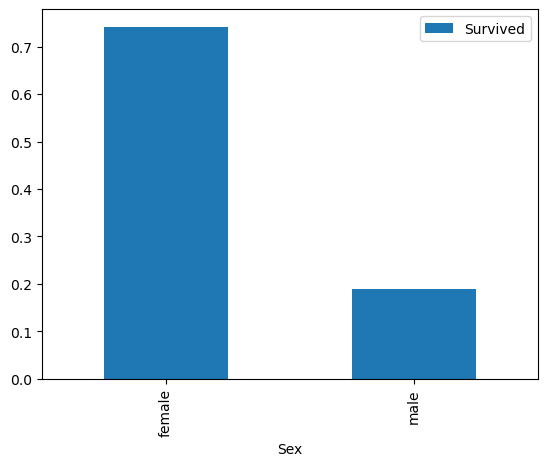

In [20]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

In [21]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


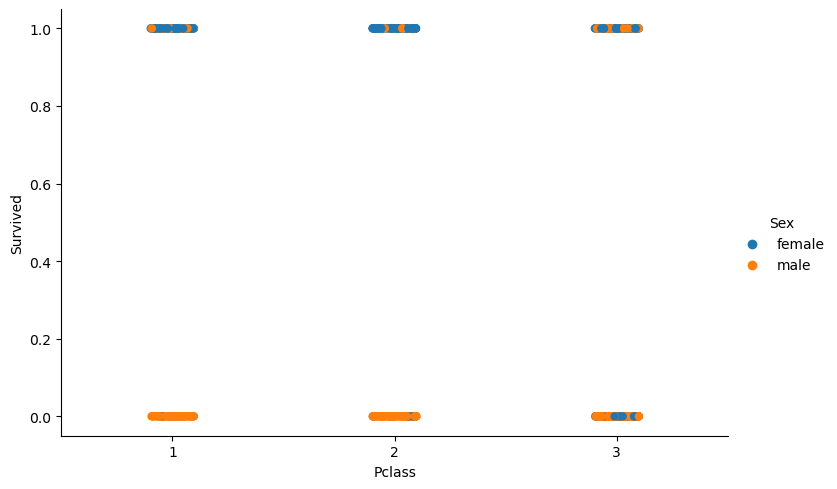

In [22]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

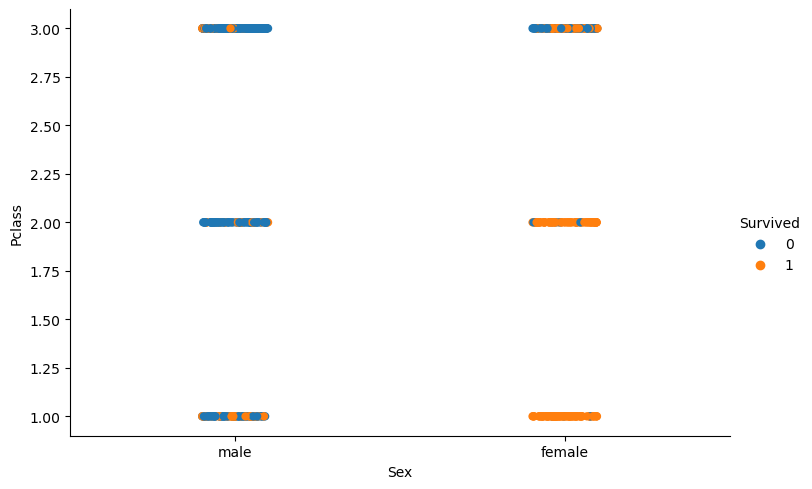

In [23]:
sns.catplot(x='Sex', y='Pclass', hue='Survived', data=df_train, size=6, aspect=1.5)

## 2.3 Age

In [24]:
print('제일 나이 많은 탑승객 : {:.1f} years'.format(df_train['Age'].max()))
print('제일 어린 탑승객 : {:.1f} years'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 years
제일 어린 탑승객 : 0.4 years
탑승객 평균 나이 : 29.7 years


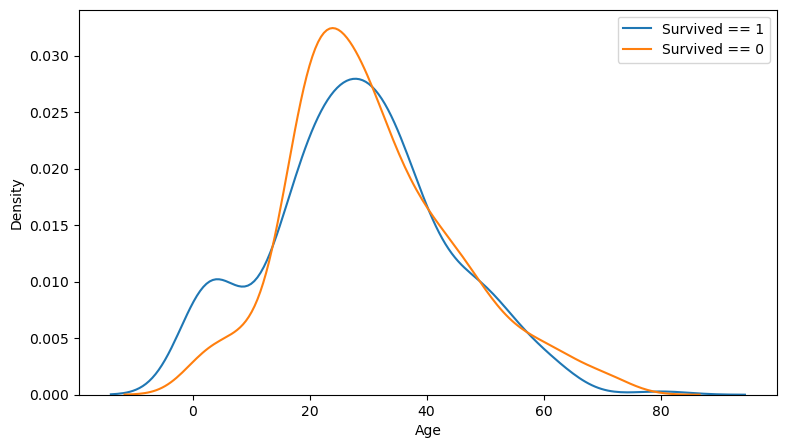

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

<Axes: >

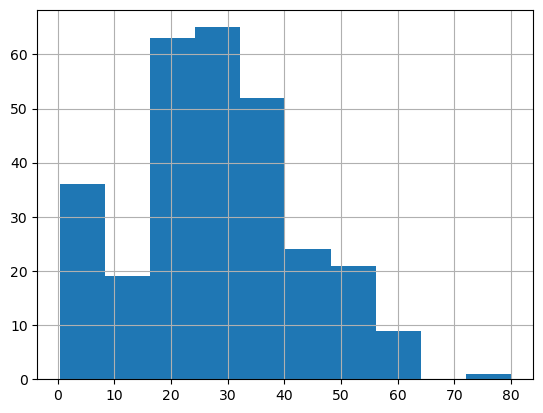

In [26]:
df_train[df_train['Survived'] == 1]['Age'].hist()

In [27]:
for row in df_train.iterrows():
    print(row)
    break


(0, PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                               22.0
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object)


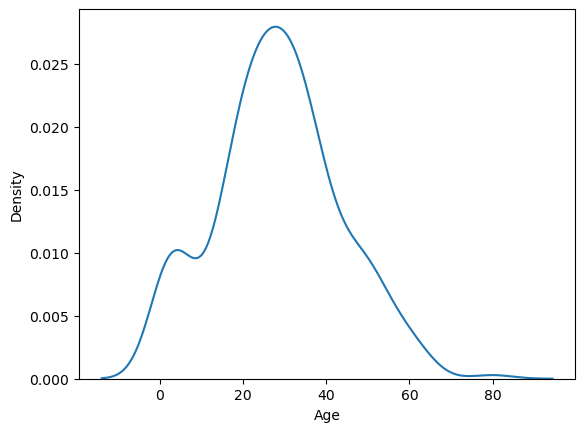

In [28]:
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'])
plt.show()

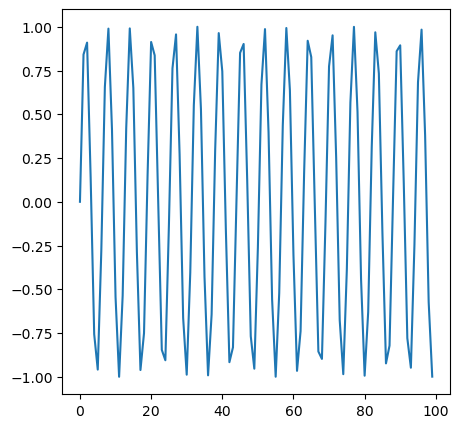

In [29]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)

ax.plot(b)

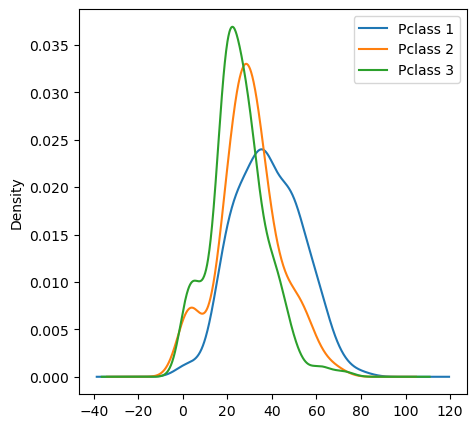

In [30]:
plt.figure(figsize=(5,5))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde', label='Pclass 1')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde', label='Pclass 2')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde', label='Pclass 3')
plt.legend()

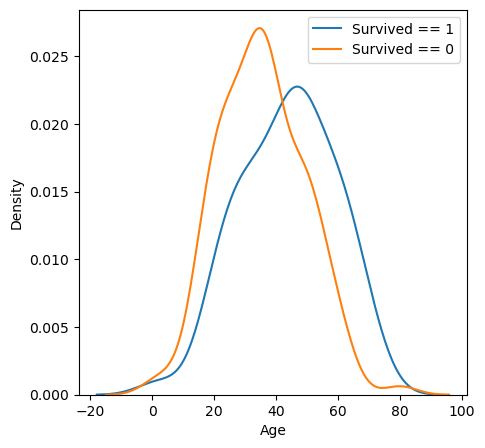

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))
# df_train[df_train['Survived'] == 1]['Age']는
# DataFrame df_train에서 'Survived' 열의 값이 1인 행들을 선택한 후
# 해당 행들의 'Age' 열만을 반환하는 것
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

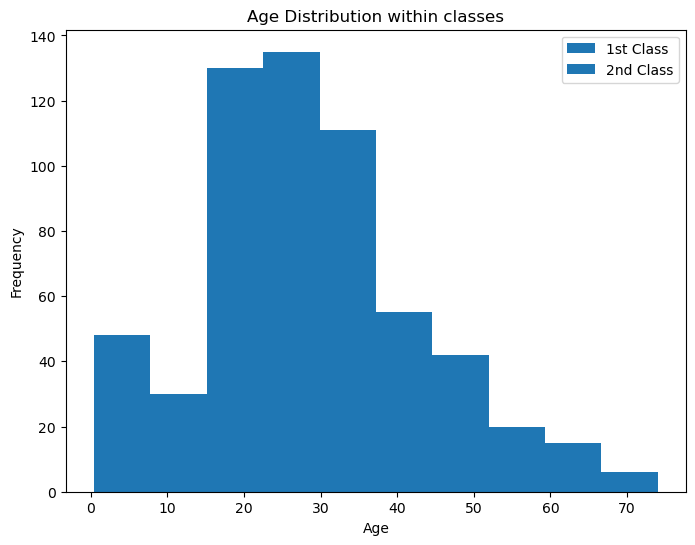

In [32]:
plt.figure(figsize=(8,6))
df_train['Age'][(df_train['Pclass'] == 1) & df_train['Survived'] == 0].plot(kind='hist')
plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

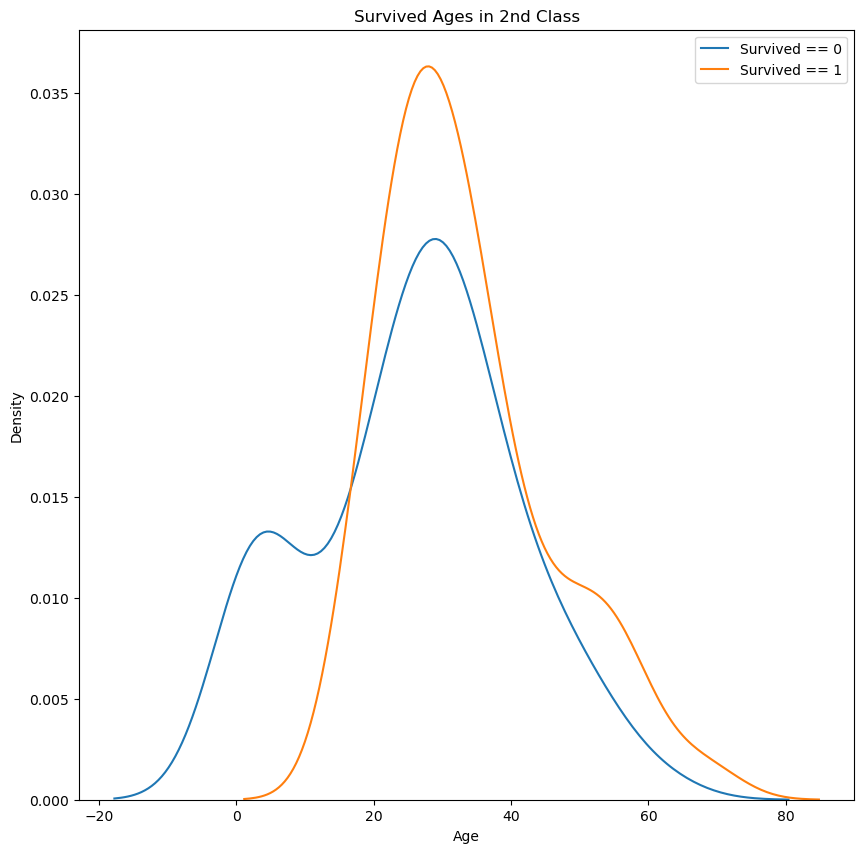

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.kdeplot(df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 1)], ax=ax)
sns.kdeplot(df_train['Age'][(df_train['Pclass'] == 2) & (df_train['Survived'] == 0)], ax=ax)
plt.title('Survived Ages in 2nd Class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()

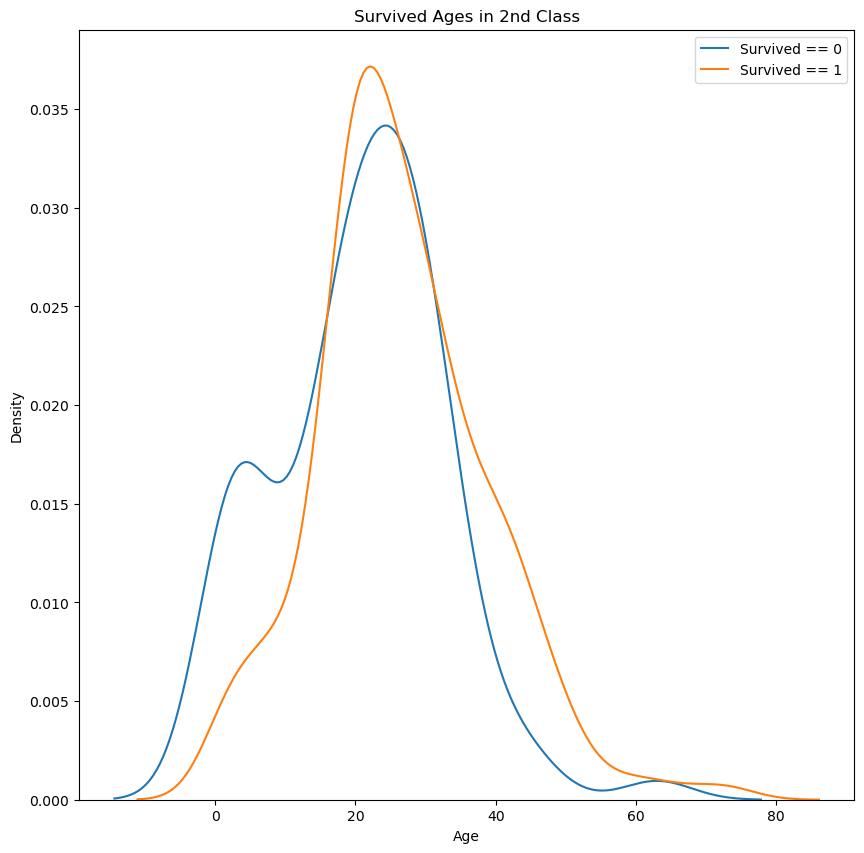

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.kdeplot(df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 1)], ax=ax)
sns.kdeplot(df_train['Age'][(df_train['Pclass'] == 3) & (df_train['Survived'] == 0)], ax=ax)
plt.title('Survived Ages in 2nd Class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()

In [35]:
change_age_range_survival_ratio = []

for i in range(80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

In [36]:
i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

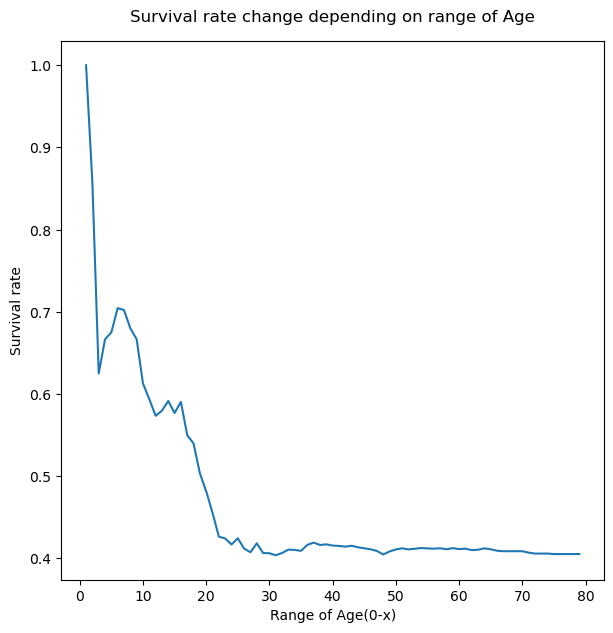

In [37]:
plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0-x)')
plt.show()

## Pclass, Sex, Age

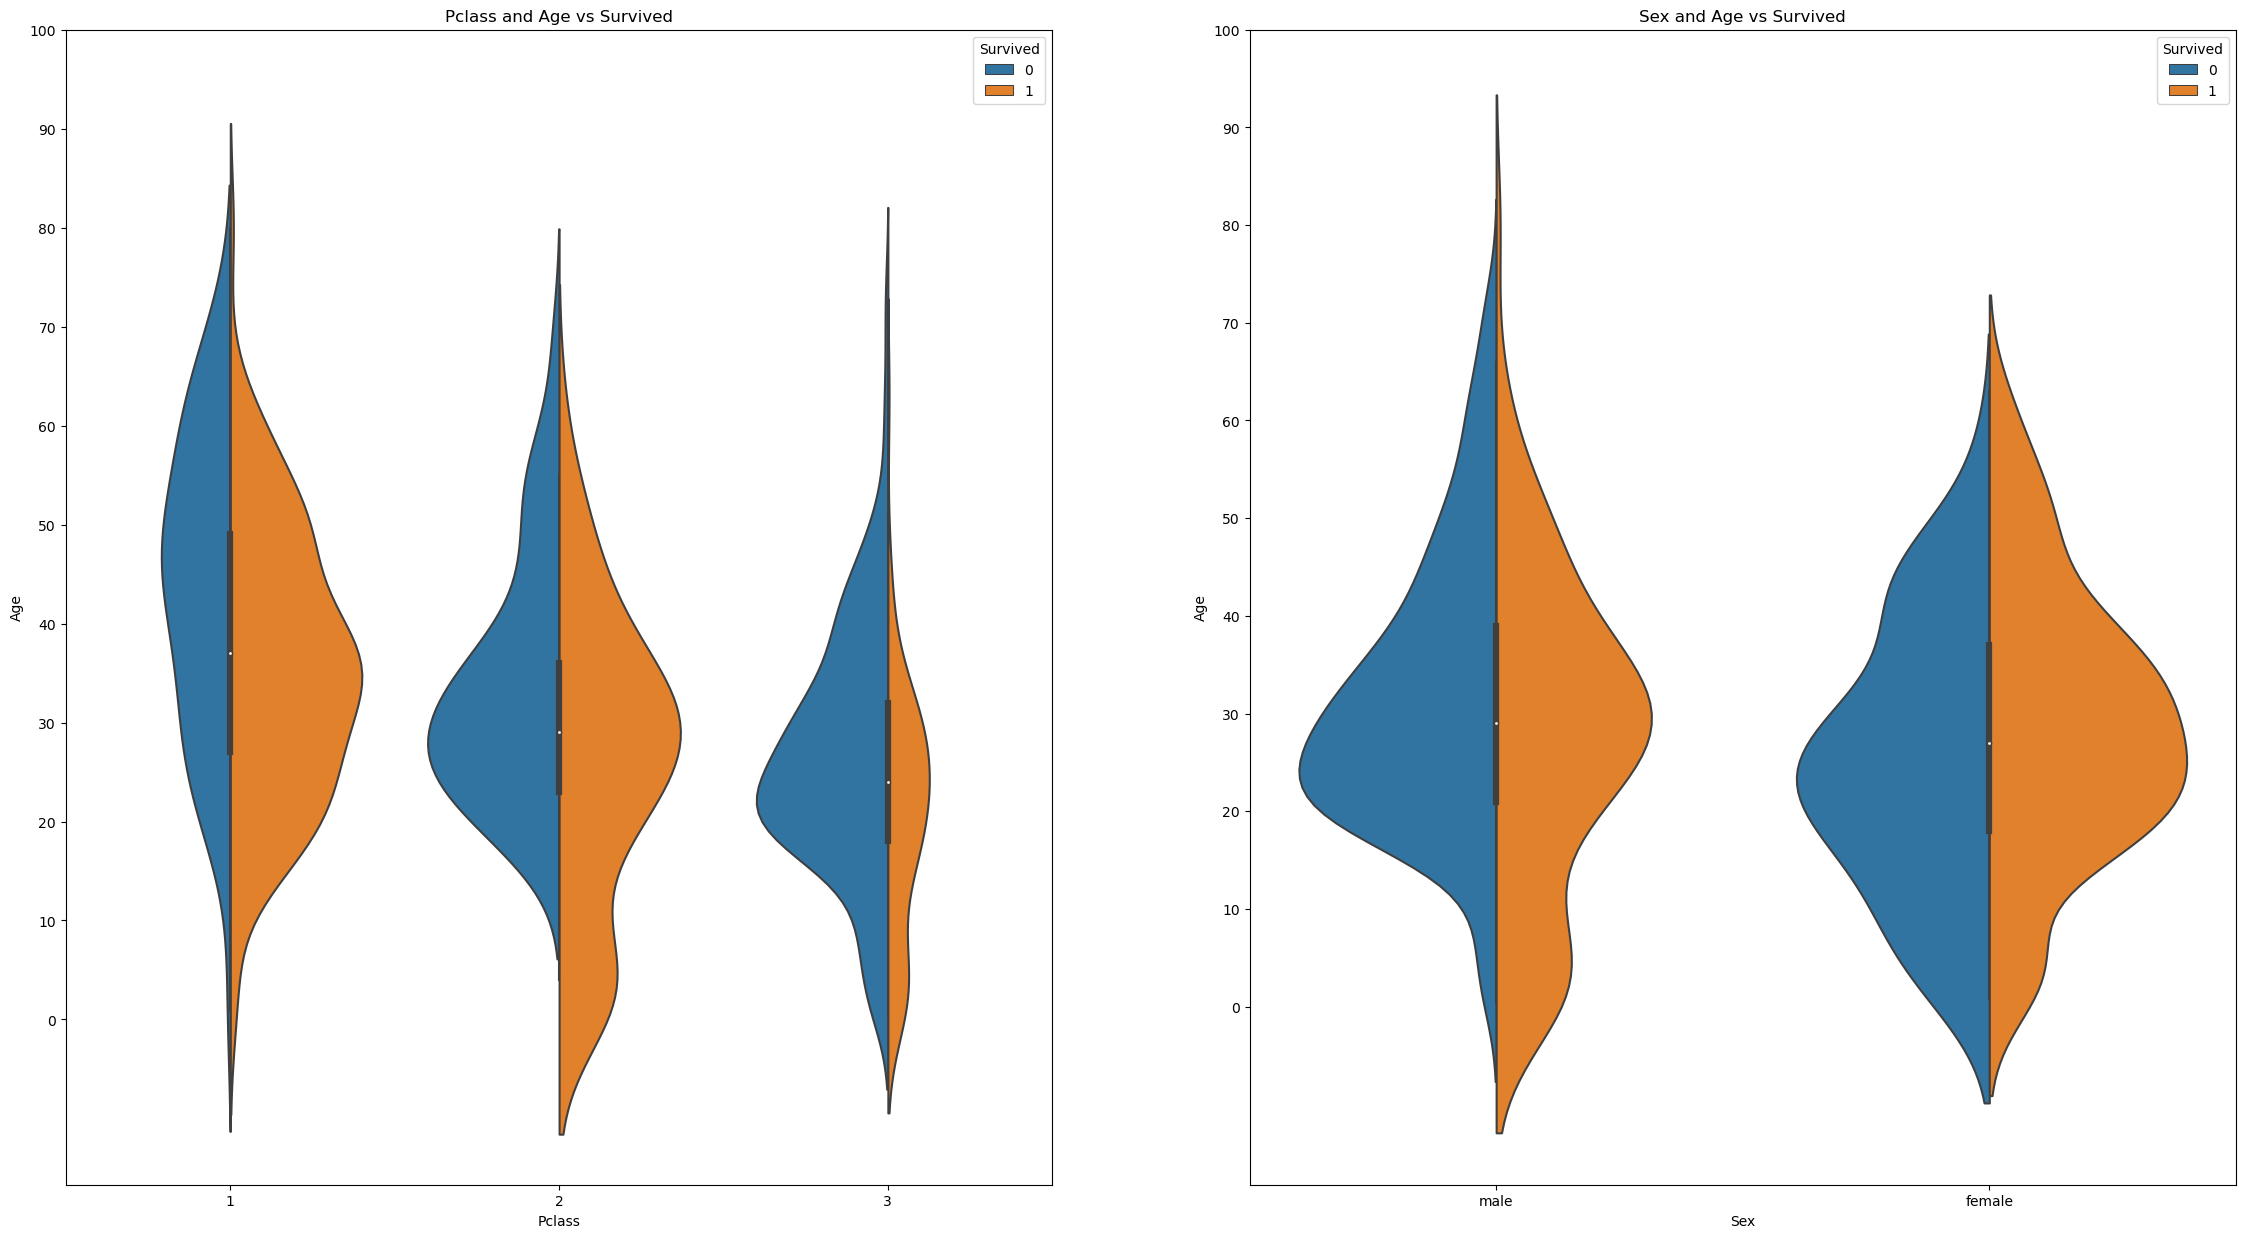

In [38]:
f, ax = plt.subplots(1, 2, figsize=(28, 15))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0]) # count는 몇 개인지 알 수 있음
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='area', split=True, ax=ax[1]) # area는 넓이가 같아지는 대신 몇 개인지 모름
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

## Embarked

<Axes: xlabel='Embarked'>

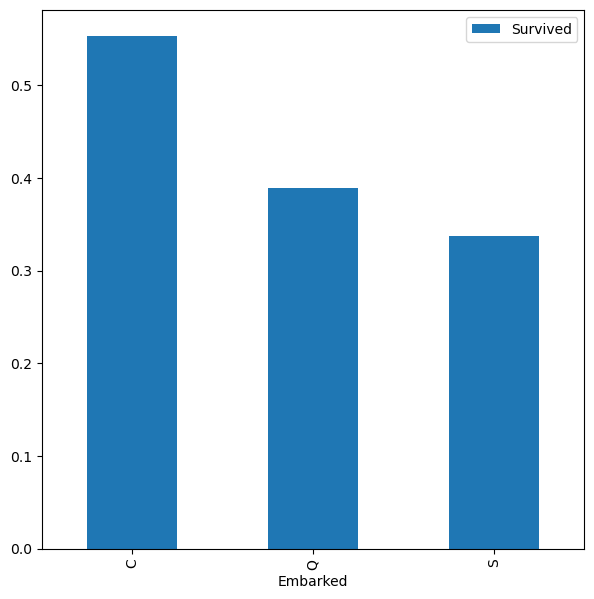

In [39]:
f, ax = plt.subplots(1, 1, figsize=(7, 7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

In [40]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [41]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_index()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


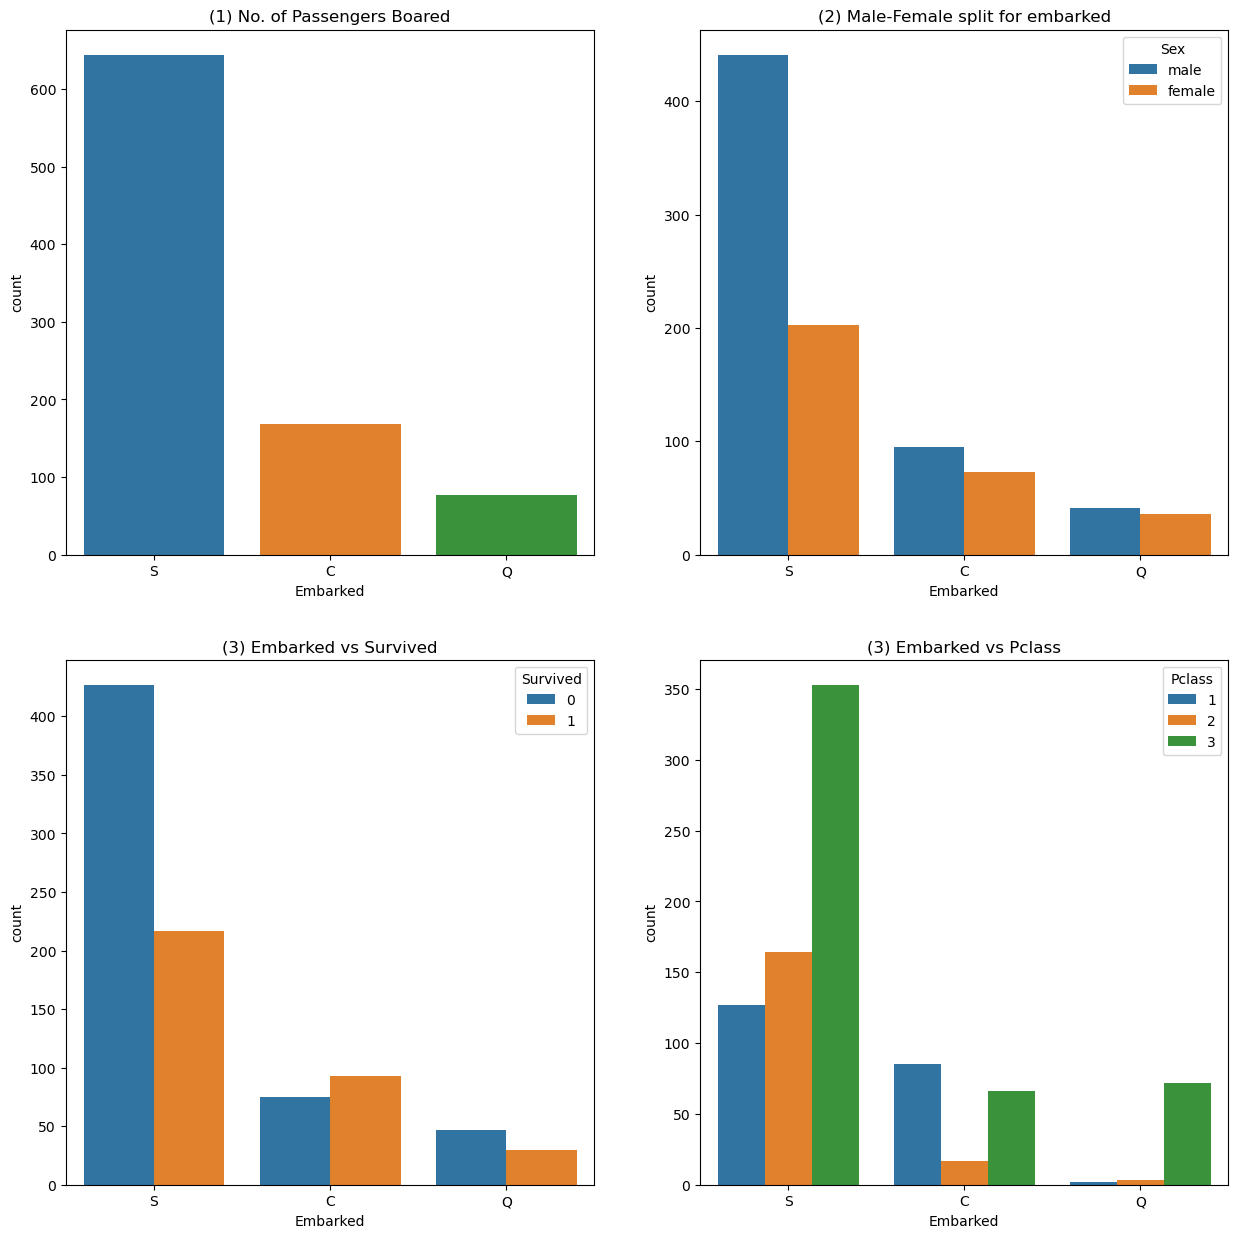

In [42]:
f, ax = plt.subplots(2, 2, figsize=(15, 15))
sns.countplot(x = 'Embarked', data=df_train, ax=ax[0, 0])
ax[0, 0].set_title('(1) No. of Passengers Boared')

sns.countplot(x='Embarked', hue='Sex', data=df_train, ax=ax[0, 1])
ax[0, 1].set_title('(2) Male-Female split for embarked')

sns.countplot(x='Embarked', hue='Survived', data=df_train, ax=ax[1, 0])
ax[1, 0].set_title('(3) Embarked vs Survived')

sns.countplot(x='Embarked', hue='Pclass', data=df_train, ax=ax[1, 1])
ax[1, 1].set_title('(3) Embarked vs Pclass')

plt.show()

## Family - SibSp + Parch

In [43]:
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # +1은 본인
df_test['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # +1은 본인

In [44]:
print('Maximum size of Family: ', df_train['FamilySize'].max())
print('Minimum size of Family: ', df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


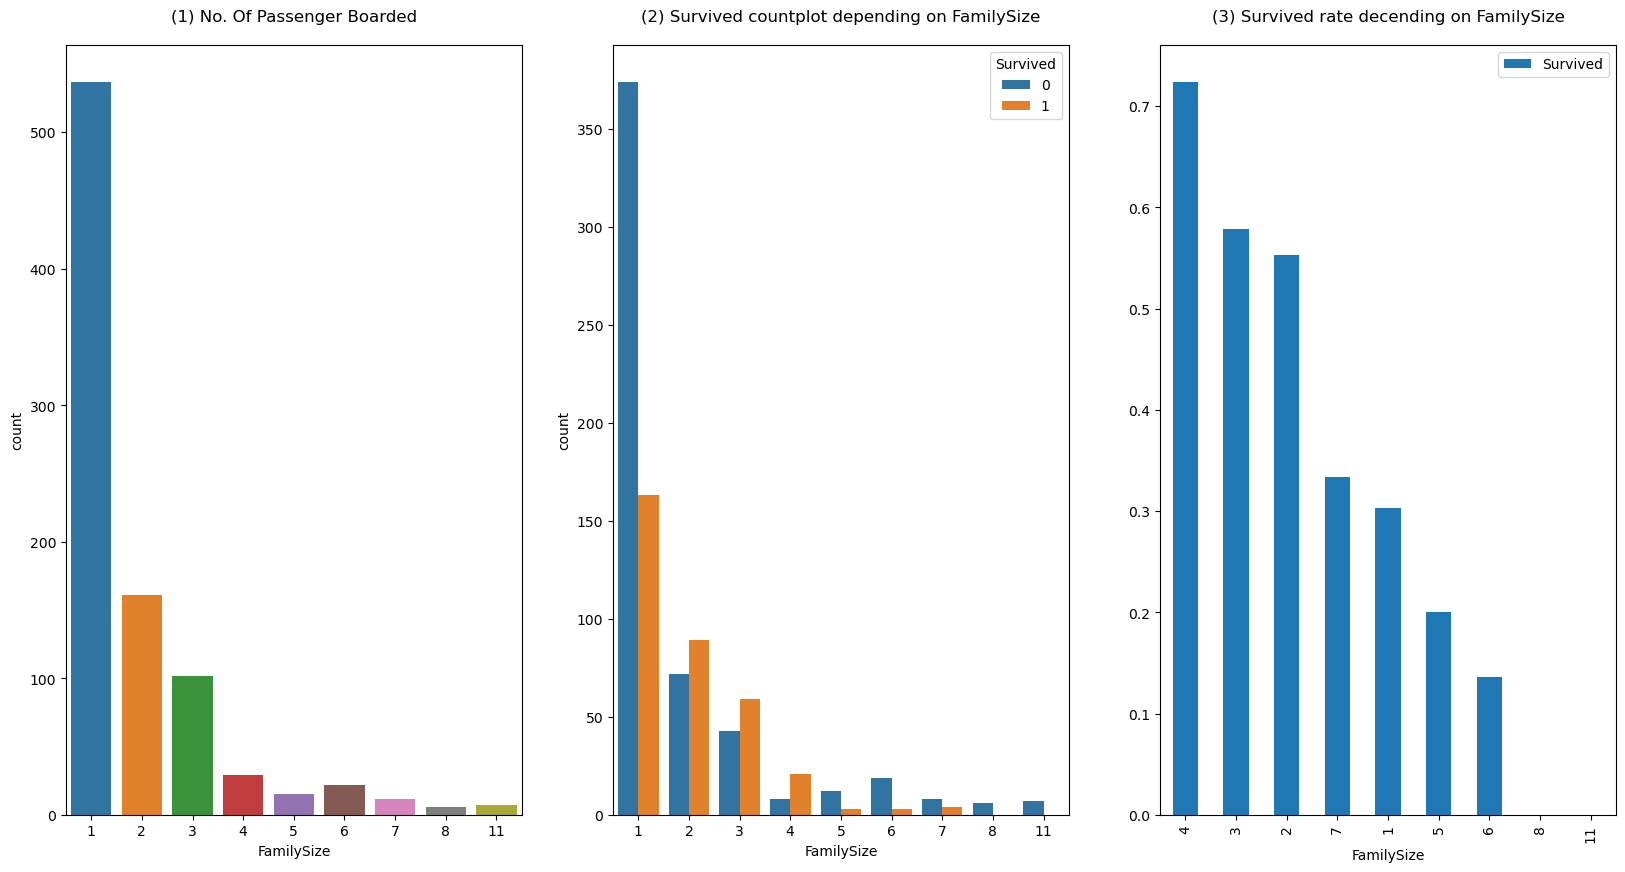

In [45]:
f, ax = plt.subplots(1, 3, figsize=(20, 10))
sns.countplot(x='FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. Of Passenger Boarded', y=1.02)

sns.countplot(x='FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate decending on FamilySize', y=1.02)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

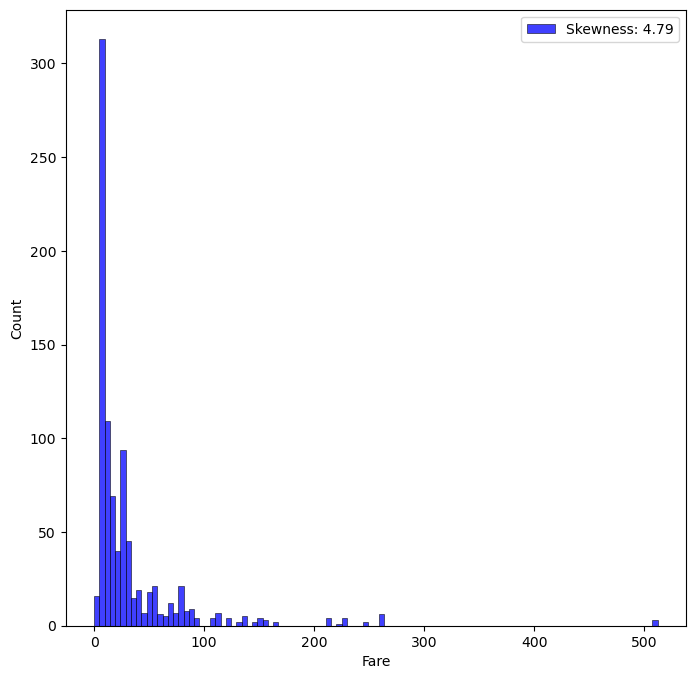

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.histplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

# 로그 처리 해줘서 0으로 가까이 가도록 만듬

In [47]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)

In [48]:
df_train['Fare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

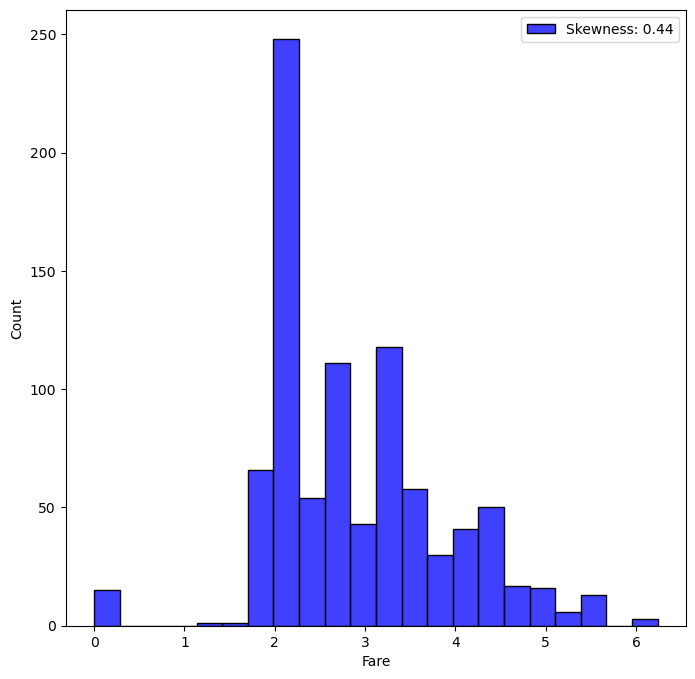

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.histplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [50]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [51]:
df_train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [52]:
df_train.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [53]:
#df_train['Name'].str # String으로 모든 것이 바뀐다.
    # 정규 표현식은 String데이터에서 뽑아내는 것이기 때문
df_train['Name'].str.extract('([A-Za-z]*)\.')
# A~Z, a~z 에서 . 이 있으면 뽑아내겠다라는 정규표현식

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [54]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')
df_test['Initial'] = df_test['Name'].str.extract('([A-Za-z]+)\.')

In [55]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [56]:
df_train['Initial'].replace(['Mlle', 'Mme','Ms', 'Dr','Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona', 'Master'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [57]:
df_test['Initial'].replace(['Mlle', 'Mme','Ms', 'Dr','Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don', 'Dona', 'Master'],
                            ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr'], inplace=True)

In [58]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,453.005272,0.191564,2.398946,30.461056,0.434095,0.237258,2.699957,1.671353
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<Axes: xlabel='Initial'>

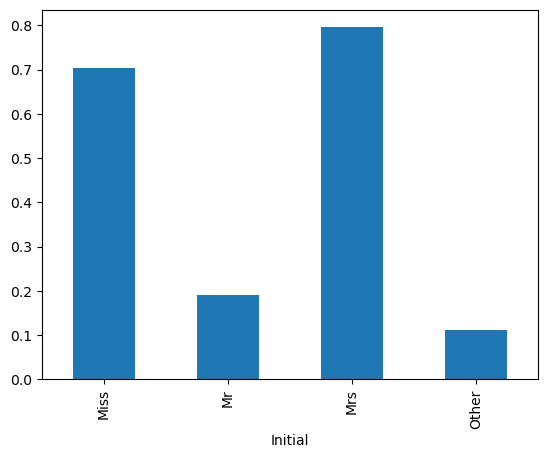

In [59]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [60]:
df_all = pd.concat([df_train, df_test]) # 합치는 것

In [61]:
#df_all.reset_index()
#df_all.reset_index(drop=True) # 합친것의 인덱스 수정하는듯?

In [62]:
df_all.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Miss,616.992453,0.704301,2.332075,21.834533,0.652830,0.494340,14.021188,2.124528
Mr,658.832933,0.191564,2.381010,30.338609,0.415865,0.248798,10.403174,1.765625
Mrs,685.673367,0.795276,1.929648,37.034884,0.658291,0.824121,23.896996,2.356784
Other,714.923077,0.111111,1.615385,44.923077,0.230769,0.153846,24.523034,1.538462


In [63]:
df_train.loc[1:3, :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs


In [64]:
df_train.loc[df_train['Survived']==1] # 많이 쓰이는 것
# 참 값 False값도 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,2.409941,NaN,S,3,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,3.403555,NaN,C,2,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,1.977547,NaN,C,1,Miss
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,4.420746,C50,C,2,Mrs
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,3.258097,NaN,S,2,Mrs
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,3.401197,B42,S,1,Miss


In [65]:
(df_train['Age'].isnull()) & (df_train['Initial']=='Mr')

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [66]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age']

5     NaN
17    NaN
26    NaN
29    NaN
36    NaN
       ..
839   NaN
846   NaN
859   NaN
868   NaN
878   NaN
Name: Age, Length: 124, dtype: float64

In [67]:
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
# 브로드캐스팅으로 마지막에 속성을 넣으면 다 채워진다
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 6
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_train.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 43

df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mr'), 'Age'] = 33
# 브로드캐스팅으로 마지막에 속성을 넣으면 다 채워진다
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Mrs'), 'Age'] = 37
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Master'), 'Age'] = 6
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Miss'), 'Age'] = 22
df_test.loc[(df_train['Age'].isnull()) & (df_train['Initial'] == 'Other'), 'Age'] = 43

In [68]:
df_train['Age'].isnull().sum() # Age의 숫자를 다 채운 것을 볼 수 있다.

0

In [69]:
df_train['Embarked'].isnull().sum()

2

In [70]:
df_train.shape

(891, 14)

In [71]:
df_test.isnull().sum().fillna(df_test.median(), inplace=True)

In [72]:
df_train['Embarked'].fillna('S', inplace=True)

In [73]:
df_train['Embarked'].isnull().sum()

0

In [74]:
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age']) & (df_train['Age'] <20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age']) & (df_train['Age'] <30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age']) & (df_train['Age'] <40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age']) & (df_train['Age'] <50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age']) & (df_train['Age'] <60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age']) & (df_train['Age'] <70), 'Age_cat'] = 6
df_train.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [75]:
df_test.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_train['Age']) & (df_train['Age'] <20), 'Age_cat'] = 1
df_test.loc[(20 <= df_train['Age']) & (df_train['Age'] <30), 'Age_cat'] = 2
df_test.loc[(30 <= df_train['Age']) & (df_train['Age'] <40), 'Age_cat'] = 3
df_test.loc[(40 <= df_train['Age']) & (df_train['Age'] <50), 'Age_cat'] = 4
df_test.loc[(50 <= df_train['Age']) & (df_train['Age'] <60), 'Age_cat'] = 5
df_test.loc[(60 <= df_train['Age']) & (df_train['Age'] <70), 'Age_cat'] = 6
df_test.loc[(70 <= df_train['Age']), 'Age_cat'] = 7

In [76]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,Mr,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,Mrs,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,Miss,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,Mrs,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,Mr,3.0


In [77]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

In [78]:
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_train['Age'].apply(category_age)

In [79]:
df_train['Age_cat'].all() # 전체가 True 일 때
df_train['Age_cat'].any() # 하나만 True 여도.

True

In [80]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,Mr,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2,Mrs,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,Mr,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,Mr,3
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,Mrs,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,Mr,3
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,Mr,4
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,Mr,3
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,3,Mr,3


In [81]:
df_train.drop(['Age'], axis = 1, inplace=True)
# axis==1 -> 세로로 날라감
df_test.drop(['Age'], axis=1, inplace=True)

In [82]:
df_train.Initial.unique() # df_train['Initial'].unique() 와 같다.

array(['Mr', 'Mrs', 'Miss', 'Other'], dtype=object)

In [83]:
df_train.loc[df_train['Initial'] == 'Master', 'Initial']

Series([], Name: Initial, dtype: object)

In [84]:
# 위의 것 보다 훨씬 쉽게 하는 방법

df_train['Initial'] = df_train['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Master' : 0, 'Miss' : 1, 'Mr' : 2, 'Mrs' : 3, 'Other' : 4})

In [85]:
df_train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [86]:
type(df_train['Embarked'].value_counts())

pandas.core.series.Series

In [87]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 'Q':1, 'S':2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [88]:
df_train.Embarked.isnull().any() # 1개라도 True가 있으면 True

False

In [89]:
df_train['Sex'].unique()

array(['male', 'female'], dtype=object)

In [90]:
df_train['Sex'] = df_train['Sex'].map({'female' : 0, 'male' : 1})
df_test['Sex'] = df_test['Sex'].map({'female' : 0, 'male' : 1})

In [91]:
# Pearson coefficient
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']]

In [92]:
heatmap_data.corr() # seaborn 라이브러리

,Survived,Pclass,Sex,Fare,Embarked,FamilySize,Initial,Age_cat
Survived,1.000000,-0.338481,-0.543351,0.331805,-0.167675,0.016639,-0.045341,-0.093369
Pclass,-0.338481,1.000000,0.131900,-0.670489,0.162098,0.065997,-0.104036,-0.309041
Sex,-0.543351,0.131900,1.000000,-0.264751,0.108262,-0.200988,0.167691,0.131236
Fare,0.331805,-0.670489,-0.264751,1.000000,-0.199932,0.389193,0.040440,0.081765
Embarked,-0.167675,0.162098,0.108262,-0.199932,1.000000,0.066516,0.052271,-0.040192
FamilySize,0.016639,0.065997,-0.200988,0.389193,0.066516,1.000000,0.003444,-0.260524
Initial,-0.045341,-0.104036,0.167691,0.040440,0.052271,0.003444,1.000000,0.316266
Age_cat,-0.093369,-0.309041,0.131236,0.081765,-0.040192,-0.260524,0.316266,1.000000


<Axes: title={'center': 'Pearson Correalation of Features'}>

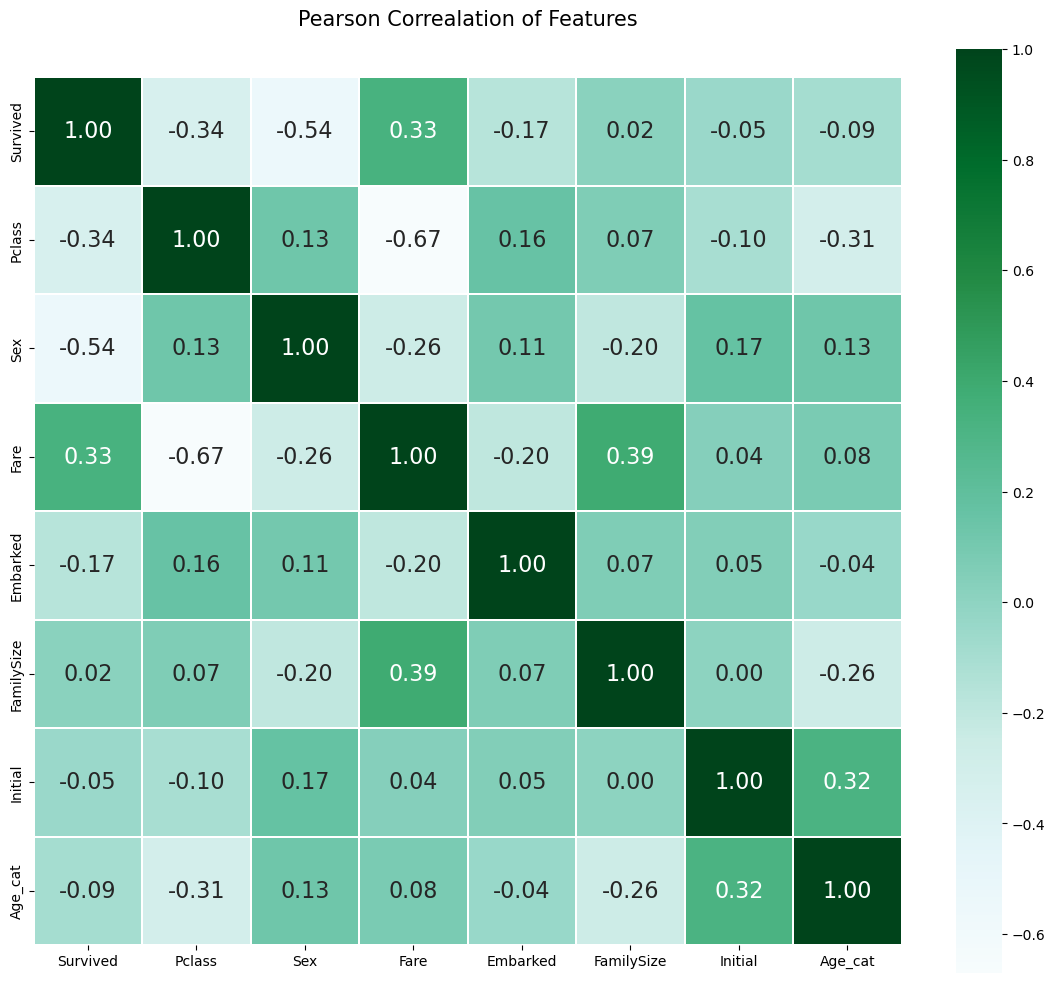

In [93]:
colormap = plt.cm.BuGn
plt.figure(figsize=(14, 12))
plt.title('Pearson Correalation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidth=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16}, fmt='.2f')

In [94]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,3
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,2,3,3
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,2,1,2,3


In [95]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial') # 원 핫 인코딩 하는 코드
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix = 'Initial')

In [96]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix = 'Emarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [97]:
# 안 쓰는 속성을 드랍
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [98]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_1,Initial_2,Initial_3,Initial_4,Emarked_0,Emarked_1,Emarked_2
0,0,3,1,1.981001,2,2,0,1,0,0,0,0,1
1,1,1,0,4.266662,2,3,0,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,1,0,0,0,0,0,1
3,1,1,0,3.972177,2,3,0,0,1,0,0,0,1
4,0,3,1,2.085672,1,3,0,1,0,0,0,0,1


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [100]:
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [101]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [102]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)

RandomForestClassifier()

In [103]:
prediction = model.predict(X_vld)

In [104]:
print('총 {}명 중 {:.2f}% 정확도로 생존 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.09% 정확도로 생존 맞춤


In [105]:
(prediction == y_vld).sum() / prediction.shape[0]

0.8208955223880597

In [106]:
model.feature_importances_

array([0.09636621, 0.11120283, 0.33896902, 0.08825792, 0.14994355,
       0.04490126, 0.08588471, 0.03176177, 0.00418906, 0.01383431,
       0.01422754, 0.02046182])

In [107]:
from pandas import Series
X_vld = pd.DataFrame(X_vld)
feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index = X_vld.columns)

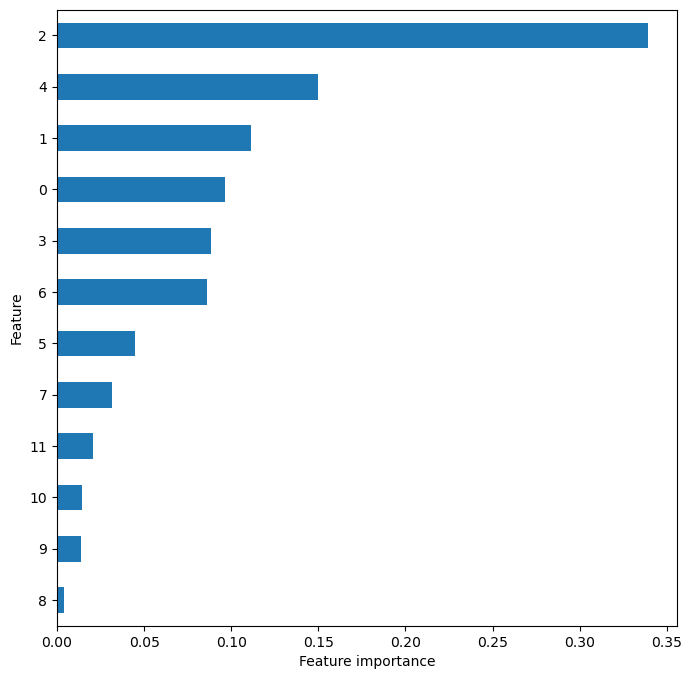

In [108]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [109]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [110]:
submission.shape

(418, 2)

In [111]:
X_test.shape

(418, 12)

In [112]:
print(submission)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [113]:
print(X_test.shape, X_tr.shape, X_vld.shape, target_label.shape, y_vld.shape, df_test.shape)

(418, 12) (623, 12) (268, 12) (891,) (268,) (418, 12)


In [114]:
df_test.isnull().sum()

Pclass        0
Sex           0
Fare          1
FamilySize    0
Age_cat       0
Initial_1     0
Initial_2     0
Initial_3     0
Initial_4     0
Embarked_0    0
Embarked_1    0
Embarked_2    0
dtype: int64

In [115]:
df_test.fillna(value=df_test['Fare'].median(), inplace=True)

In [116]:
prediction = model.predict(df_test)

In [117]:
submission['Survived'] = prediction

In [118]:
submission.to_csv('./my_first_submission.csv', index = False)